In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from fbprophet import Prophet

In [4]:
## Qtde views página Wikipedia

# dataset = pd.read_csv('page_wikipedia.csv') # Colab
dataset = pd.read_csv('/Users/fernandovieira/OneDrive/1. Educacao/INFO E ESTAT/IA Expert/ML-e-DS-com-Python-de-A-a-Z/Bases de dados/page_wikipedia.csv') # Mac
dataset

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [5]:
dataset.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


array([[<AxesSubplot:title={'center':'views'}>]], dtype=object)

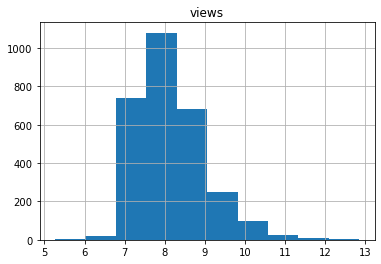

In [12]:
dataset.hist()

In [13]:
# renomear as colunas para o padrão do fbprophet
dataset = dataset.rename(columns={'date': 'ds', 'views': 'y'})

In [15]:
# colocando em ordem cronológica
dataset = dataset.sort_values(by='ds')